EDA Checklist:

1. Understanding the dataset and its shape
2. Checking the data type of each columns
3. Categorical & Numerical Columns
4. Chekcing for missing values
5. Descriptive simmary of the dataset
6. Groupby for classification problems

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [8]:
breast_cancer_data = pd.read_csv('/data.csv')

# EDA

In [9]:
#Printing first 5 rows
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
#Removing the unnamed columns
breast_cancer_data.drop(columns='Unnamed: 32', axis=1, inplace=True)
# Axis = 1 as we want to remove a column , it would be 0 if we wanted to remove a row
# inplace = True removes the column in the orignal dataset and saves it

In [11]:
breast_cancer_data.shape

(569, 32)

In [12]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
# Removing the ID Column
breast_cancer_data.drop(columns='id', axis=1, inplace=True)

Diagnosis Column is the Categorical Column rest are continuos values

In [14]:
#Check for missing values
breast_cancer_data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


No Missing Values

Statistical Summary of the Data - Descriptive Statistics

In [15]:
breast_cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**count**: The number of non-null (non-NaN) entries in the dataset for each column.

**mean**: The arithmetic average of the values in each column, calculated as the sum of the values divided by the count.

**std (Standard Deviation)**: A measure of how spread out the values are around the mean. It quantifies the amount of variation or dispersion in the data.

**min**: The minimum value in each column.

**25% (1st Quartile)**: The value below which 25% of the data fall. It is the first quartile (Q1), also known as the lower quartile.

**50% (Median or 2nd Quartile)**: The median value, where 50% of the data points are smaller and 50% are larger. This is the second quartile (Q2).

**75% (3rd Quartile)**:The value below which 75% of the data fall. It is the third quartile (Q3), also known as the upper quartile.

**max**:The maximum value in each column.





Positively Skewed (Right-Skewed): Mean > Median

Negatively Skewed (Left-Skewed): Mean < Median

Symmetrical (No Skewness): Mean ≈ Median

If Skewness exists we have different methods to remove it.
This is done in Feature Engineering.

In [16]:
#Checking Distribution of Target Variable
breast_cancer_data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


When there is a huge imbalance in the Dataset we use Down Sampling or Upsampling to combat it.

In [17]:
# Encoding the Target Column
label_encode = LabelEncoder()
labels = label_encode.fit_transform(breast_cancer_data['diagnosis'])
breast_cancer_data['target'] = labels
breast_cancer_data.drop(columns='diagnosis', axis=1, inplace=True)
#The code above is basically tranforming the diagnosis column into '0' and '1' and creating a new column 'Target' with the diagnosis data and then deleting the Diagnosis column



In [18]:
# Print the Data again
breast_cancer_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [19]:
# Value Count for Target Column
breast_cancer_data['target'].value_counts()

,count
target,
0,357
1,212


Benign ---> 0
Malignant ---> 1

In [20]:
# Grouping the Data based on Target Variable
breast_cancer_data.groupby('target').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


# Data Visualisation

<Axes: xlabel='target', ylabel='count'>

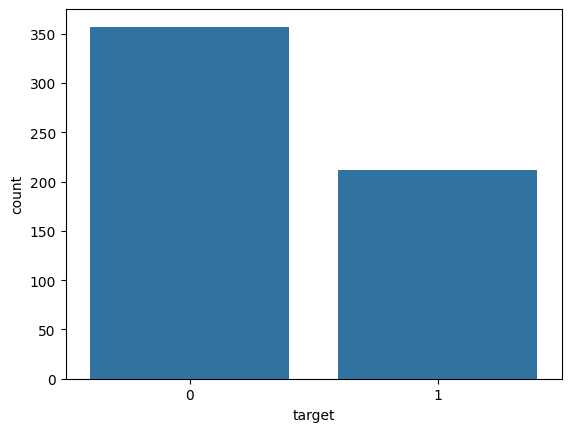

In [22]:
# Creating a Countplot for Target Column
sns.countplot(x='target', data=breast_cancer_data)

In [23]:
for column in breast_cancer_data:
  print(column)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
target


In [ ]:
# Creating a Distribution Plot for Each Column
for column in breast_cancer_data:
  sns.displot(x=column, data=breast_cancer_data)

In the plot above we observe that most of the data is right skewed.
To tell the skewness just look at the tail.
Certain models are not afected by Skewness (Random Forest etc) while some models are (Regression models).

In [ ]:
for column in breast_cancer_data:
  sns.distplot(x=breast_cancer_data.radius_mean)

# **Pair Plot**
This type of Plotting helps us compare 2 Features. This is called as Bivariate Analysis.

In [ ]:
#Pair Plot
sns.pairplot(breast_cancer_data)
plt.show()

Scatter Plot of any 2 Columns

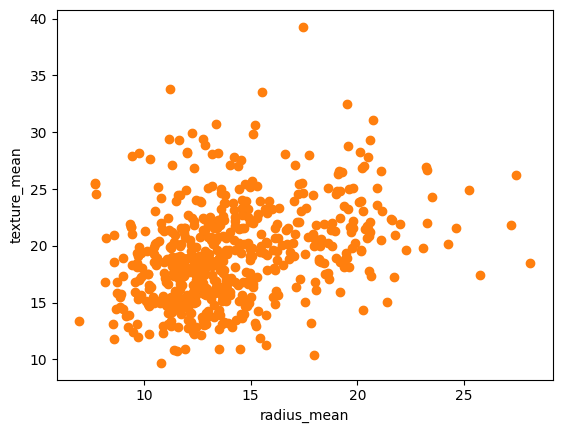

In [31]:
# Scatter plot of first 2 columns
sns.scatterplot(x='radius_mean', y='texture_mean', data=breast_cancer_data)
plt.scatter(x='radius_mean', y='texture_mean', data=breast_cancer_data)

# Outlier Detection
Box Plot for visualizing the Outliers in the Dataset

In [ ]:
# Create a Boxplot seperate for each column
for column in breast_cancer_data:
  plt.figure()
  breast_cancer_data.boxplot([column])


Values which are more than 1.5 times the interquartile range are called the Outliers.
If there are alot of outliers you can replace them by the Median Value. And if there are few outliers you can use the mean value of that feature.
Missing Value can also be handled by replacing them with Median Value when you don't have alot of Outliers.

# Correlation Matrix


In [34]:
correlation = breast_cancer_data.corr()

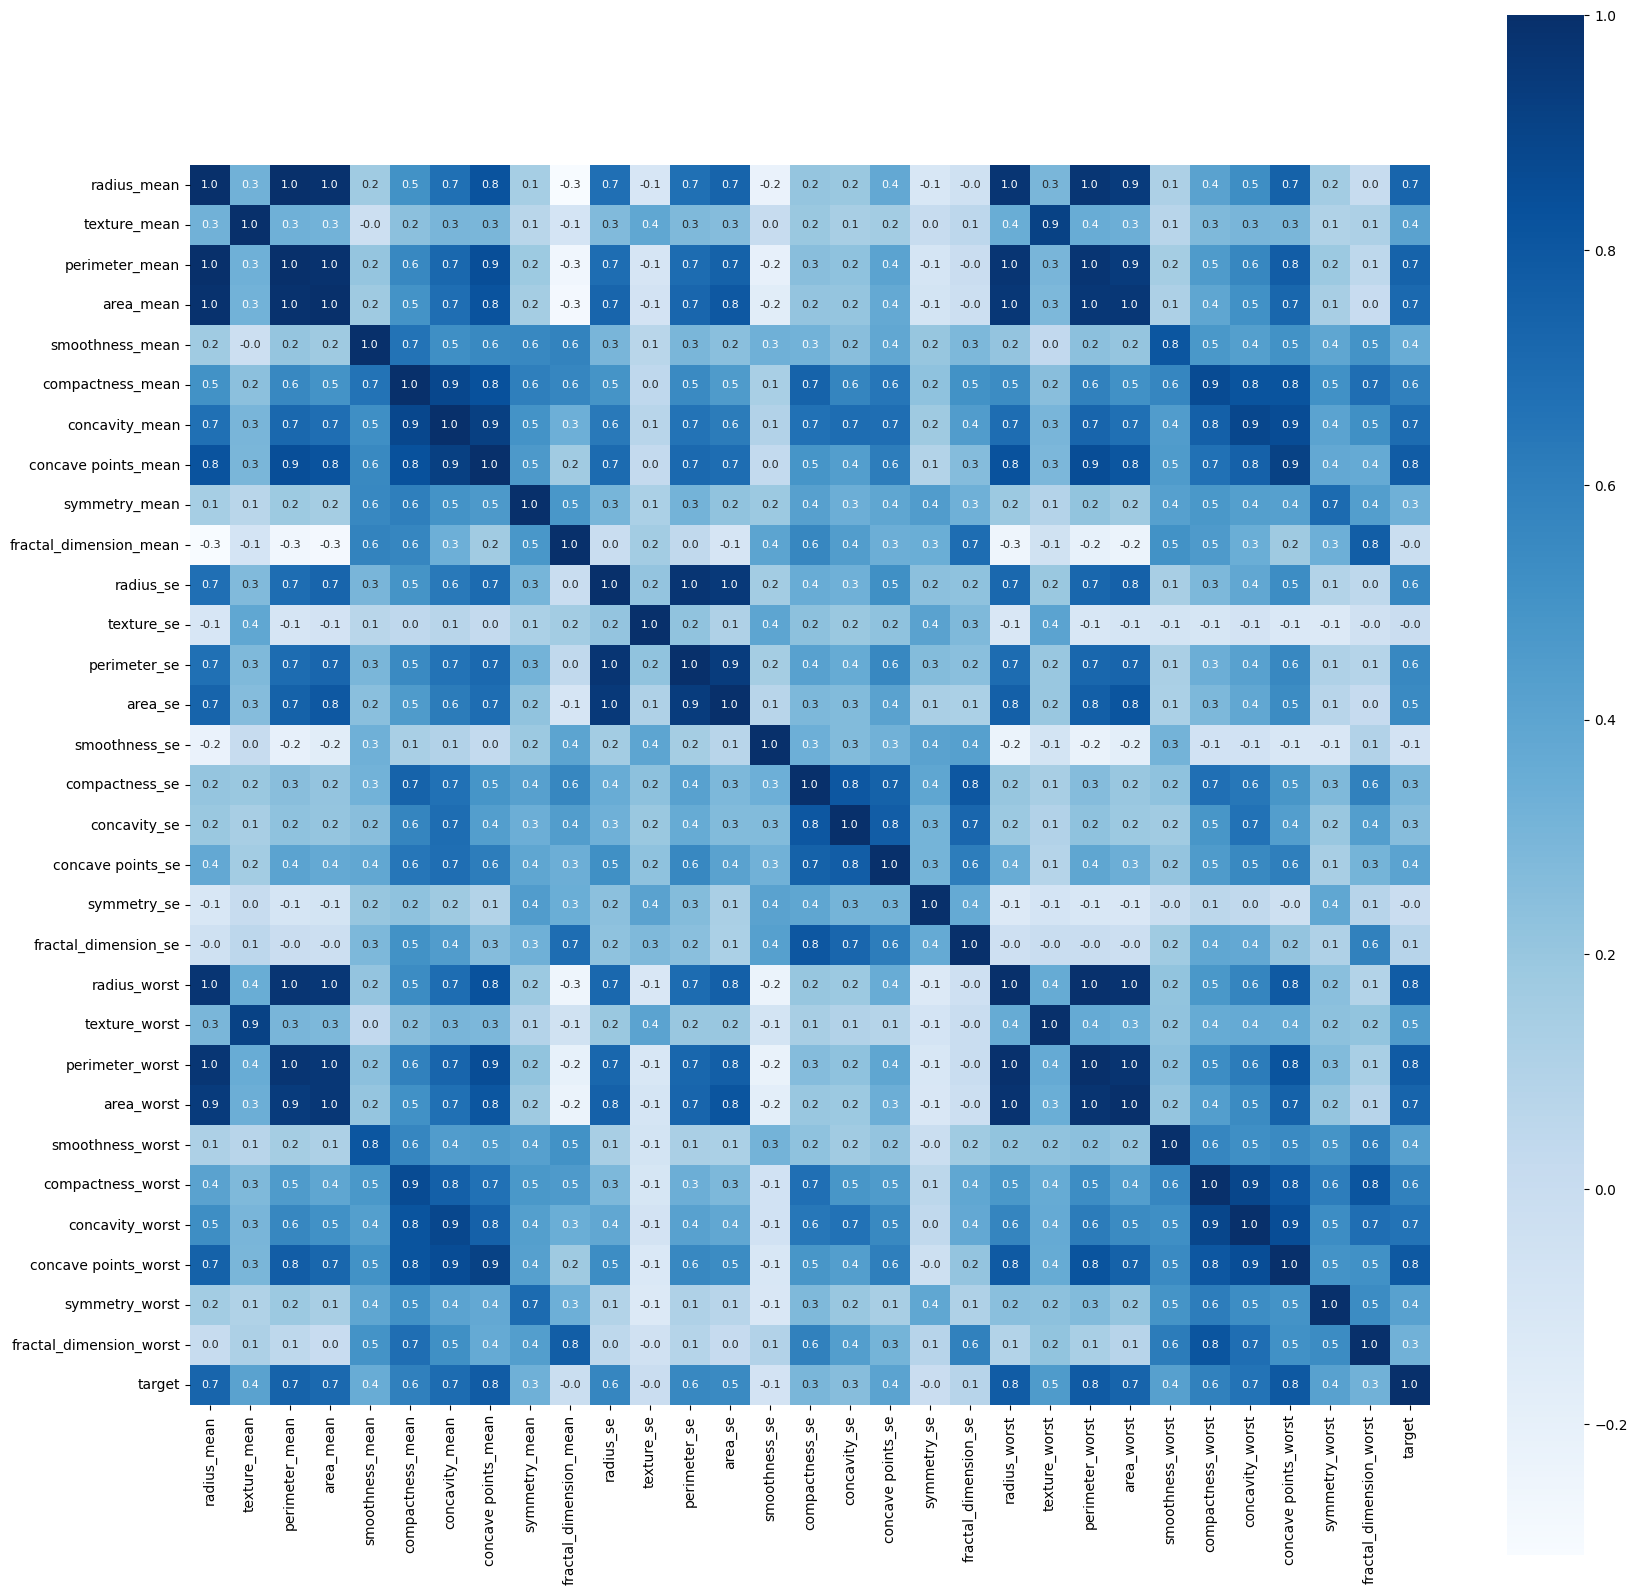

In [35]:
# Contructing a Heat Map to Visualize the Correlation Matrix
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.savefig('Correlation Heat Map')

Feature which have very strong correlation between them can be taken out. For example Radius Mean and Perimeter , Area Mean have a '1' correlation.
It is optimal to remove feature that are very similar to each other.

---


**Multicolinearity Problem **

---


Multicolinearity exists when an Independent variable is highly correlated wih one or more independent variables. We can remove the features of they have a high Positive or Negative Correlation between them.

**Inference from EDA & Data Visualization:**
1. No Missing Values
2. All are continuos numerical values expect for Target Column
3. Mean is slightly more than the Median for most of the feautures. So it is right Skewed.
4. Slight Imbalance in the dataset (More Benign Cases)
5. Mean of most features are clearly larger for Malignant Cases compared to the Benign Cases (Groupby)
6. Most of the Features have Outliers
7. Correlation Matrix reveals the most of the features are highly correlated. So we can remove certain features during feature selection.